# Wrangle and Analyze: WeRateDogs

A data analysis project focused on data wrangling efforts.



## Table of Contents

* Gather
* Assess
  * Detect and document at least eight (8) quality issues and two (2) tidiness issues
* Clean
* Storing, Analyzing, and Visualizing Data
  * At least three (3) insights and one (1) visualization must be produced
* Wrangling Efforts Report

### Gather

Data gathered from three resources:

1.	The WeRateDogs Twitter archive.
2.	According to a neural network, the tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet.
3.	Twitter API and Python's Tweepy library to gather each tweet's retweet count and favorite ("like") count at a minimum and any additional data I find interesting.


In [1]:
#Import the necessary libraries
import numpy as np
import pandas as pd

In [2]:
# Open the csv file
archive = pd.read_csv('twitter-archive-enhanced.csv')
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
# Download the image prediction file using the link provided to Udacity students
import requests
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
image_request = requests.get(url, allow_redirects=True)

open('image_predictions.tsv', 'wb').write(image_request.content)

335079

In [4]:
images = pd.read_csv('image_predictions.tsv', sep = '\t')
images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [5]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

In [6]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'hidden'
consumer_secret = 'hidden'
access_token = 'hidden'
access_secret = 'hidden'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [7]:
# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = archive.tweet_id.values
len(tweet_ids)

2356

In [ ]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)
#I am not running this query because I don't have Twitter API, and I tried that script too, which you said to use in the reviews
#but still, I m getting errors as creds are defined.

In [9]:
twitter_counts_df = pd.read_csv('twitter_archive_master.csv')
twitter_counts_df = twitter_counts_df[['tweet_id', 'favorite_count', 'retweet_count']]

In [10]:
twitter_counts_df.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,37664,8210
1,892177421306343426,32352,6072
2,891815181378084864,24372,4015
3,891689557279858688,40966,8360
4,891327558926688256,39178,9067


## Assess

This section will go over the following:

* Quality Issues
* Tidiness Issues

### Quality Issues


The four main data quality dimensions are:

* Completeness: missing data?
* Validity: does the data make sense?
* Accuracy: inaccurate data? (wrong data can still show up as valid)
* Consistency: standardization?

### Tidiness Issues


Three requirements for tidiness:

* Each variable forms a column
* Each observation forms a row
* Each type of observational unit forms a table


### Archive Dataframe Analysis

In [11]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [12]:
archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [13]:
archive.describe

<bound method NDFrame.describe of                 tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
...                  ...                    ...                  ...   
2351  666049248165822465                    NaN                  NaN   
2352  666044226329800704                    NaN                  NaN   
2353  666033412701032449                    NaN                  NaN   
2354  666029285002620928                    NaN                  NaN   
2355  666020888022790149                    NaN                  NaN   

                      timestamp  \
0     2017-08-01 16:23:56 +0000   
1     2017-08-01 00:17:27 +0000

In [14]:
archive[archive.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [15]:
archive['name'].value_counts()

None        745
a            55
Charlie      12
Lucy         11
Cooper       11
           ... 
Jessiga       1
Maxwell       1
Jennifur      1
Sweet         1
Chubbs        1
Name: name, Length: 957, dtype: int64

In [16]:
archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
0         2
15        2
75        2
420       2
182       1
204       1
143       1
121       1
99        1
20        1
45        1
27        1
17        1
24        1
26        1
44        1
50        1
60        1
80        1
84        1
88        1
1776      1
960       1
666       1
144       1
165       1
Name: rating_numerator, dtype: int64

In [17]:
archive.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
0         1
120       1
7         1
170       1
150       1
130       1
90        1
110       1
2         1
70        1
40        1
16        1
15        1
Name: rating_denominator, dtype: int64

### Image Dataframe Analysis

In [18]:
images.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
914,700890391244103680,https://pbs.twimg.com/media/CboQFolWIAE04qE.jpg,1,white_wolf,0.166563,False,schipperke,0.122356,True,West_Highland_white_terrier,0.119247,True
1609,801115127852503040,https://pbs.twimg.com/media/Cx4h7zHUsAAqaJd.jpg,1,dalmatian,0.823356,True,English_setter,0.094602,True,bluetick,0.021953,True
533,676897532954456065,https://pbs.twimg.com/media/CWTSt0UW4AALMNB.jpg,1,hamster,0.628255,False,guinea_pig,0.318646,False,macaque,0.013058,False
1225,744995568523612160,https://pbs.twimg.com/media/ClbBg4WWEAMjwJu.jpg,1,Old_English_sheepdog,0.427481,True,Shih-Tzu,0.146336,True,Tibetan_terrier,0.134269,True
640,681302363064414209,https://pbs.twimg.com/media/CXR44l9WcAAcG_N.jpg,1,frilled_lizard,0.326259,False,tailed_frog,0.104539,False,axolotl,0.072479,False


In [19]:
# Just figuring out how to get Jupyter Notebook to show images
from IPython.display import Image 
Image(url = 'https://pbs.twimg.com/media/Clb5pLJWMAE-QS1.jpg')
# This is an image for tweet_id 745057283344719872

In [20]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
images[images.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [22]:
images['p1'].value_counts()

golden_retriever       150
Labrador_retriever     100
Pembroke                89
Chihuahua               83
pug                     57
                      ... 
American_black_bear      1
lawn_mower               1
military_uniform         1
panpipe                  1
park_bench               1
Name: p1, Length: 378, dtype: int64

In [23]:
images['p2'].value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
neck_brace              1
breakwater              1
necklace                1
pickup                  1
waffle_iron             1
Name: p2, Length: 405, dtype: int64

In [24]:
images['p3'].value_counts()

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
rapeseed               1
pajama                 1
ox                     1
crossword_puzzle       1
croquet_ball           1
Name: p3, Length: 408, dtype: int64

### Twitter Counts Dataframe Analysis

In [25]:
twitter_counts_df.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,37664,8210
1,892177421306343426,32352,6072
2,891815181378084864,24372,4015
3,891689557279858688,40966,8360
4,891327558926688256,39178,9067


In [26]:
twitter_counts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991 entries, 0 to 1990
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        1991 non-null   int64
 1   favorite_count  1991 non-null   int64
 2   retweet_count   1991 non-null   int64
dtypes: int64(3)
memory usage: 46.8 KB


In [28]:
twitter_counts_df.describe

<bound method NDFrame.describe of                 tweet_id  favorite_count  retweet_count
0     892420643555336193           37664           8210
1     892177421306343426           32352           6072
2     891815181378084864           24372           4015
3     891689557279858688           40966           8360
4     891327558926688256           39178           9067
...                  ...             ...            ...
1986  666049248165822465             105             42
1987  666044226329800704             290            136
1988  666033412701032449             121             43
1989  666029285002620928             125             46
1990  666020888022790149            2515            496

[1991 rows x 3 columns]>

In [29]:
twitter_counts_df[twitter_counts_df.tweet_id.duplicated()]

,tweet_id,favorite_count,retweet_count


In [32]:
twitter_counts_df.favorite_count.mean()

8634.029633350076

In [33]:
twitter_counts_df.retweet_count.mean()

2618.182320441989

## Clean

This section consists of the cleaning portion of the data wrangling process:

* Define
* Code
* Test

In [34]:
# Make a copy of the tables before cleaning
archive_clean = archive.copy()
images_clean = images.copy()
twitter_counts_df_clean = twitter_counts_df.copy()

#### Define

1. Merge the clean versions of archive, images, and twitter_counts_df dataframes Correct the dog types
2. Create one column for the various dog types: doggo, floofer, pupper, puppo Remove columns no longer needed: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp
3. Delete retweets
4. Remove columns no longer needed
5. Change tweet_id from an integer to a string
6. Change the timestamp to correct datetime format
7. Correct naming issues
8. Standardize dog ratings
9. Creating a new dog_breed column using the image prediction data.

#### 1. Code and Test: Merge the clean versions of archive, images, and twitter_counts_df dataframes

In [35]:
from functools import reduce
dfs = [archive_clean, images_clean, twitter_counts_df_clean]
twitter_dogs = reduce(lambda left, right:  pd.merge(left, right, on = 'tweet_id'), dfs)

In [36]:
twitter_dogs.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,37664,8210
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,32352,6072
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,24372,4015
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,40966,8360
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,39178,9067


In [37]:
# 1. Testing to see if functools worked
twitter_dogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1991 entries, 0 to 1990
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1991 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   1991 non-null   object 
 4   source                      1991 non-null   object 
 5   text                        1991 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               1991 non-null   object 
 10  rating_numerator            1991 non-null   int64  
 11  rating_denominator          1991 non-null   int64  
 12  name                        1991 non-null   object 
 13  doggo                       1991 

#### 2. Code and Test: Create one column for the various dog types: doggo, floofer, pupper, puppo

In [38]:
# Extract the text from the columns into the new dog_type colunn
twitter_dogs['dog_type'] = twitter_dogs['text'].str.extract('(doggo|floofer|pupper|puppo)')

In [39]:
# 2 - Testing
twitter_dogs[['dog_type']].head()

,dog_type
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN


In [40]:
twitter_dogs[['dog_type', 'doggo', 'floofer', 'pupper', 'puppo']].head()

,dog_type,doggo,floofer,pupper,puppo
0,NaN,None,None,None,None
1,NaN,None,None,None,None
2,NaN,None,None,None,None
3,NaN,None,None,None,None
4,NaN,None,None,None,None


In [41]:
twitter_dogs[['dog_type', 'doggo', 'floofer', 'pupper', 'puppo']].sample(10)

,dog_type,doggo,floofer,pupper,puppo
997,NaN,None,None,None,None
1241,NaN,None,None,None,None
1791,NaN,None,None,None,None
1880,NaN,None,None,None,None
1852,NaN,None,None,None,None
752,NaN,None,None,None,None
506,NaN,None,None,None,None
1051,NaN,None,None,None,None
1581,NaN,None,None,None,None
1734,NaN,None,None,None,None


In [42]:
# 2 - Test
twitter_dogs.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,dog_type
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,False,bagel,0.085851,False,banana,0.076110,False,37664,8210,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,True,Pekinese,0.090647,True,papillon,0.068957,True,32352,6072,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,True,malamute,0.078253,True,kelpie,0.031379,True,24372,4015,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,40966,8360,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,39178,9067,NaN


In [43]:
twitter_dogs[twitter_dogs.tweet_id == 855851453814013952]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,dog_type
147,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,...,True,Labrador_retriever,0.115138,True,groenendael,0.0961,True,45808,18088,puppo


In [44]:
twitter_dogs.dog_type.value_counts()

pupper     223
doggo       72
puppo       28
floofer      3
Name: dog_type, dtype: int64

#### 3 Code and Test: Delete retweets

In [45]:
# 3 - Code 
#Keep the columns where retweeted_status_id is NaN
twitter_dogs = twitter_dogs[np.isnan(twitter_dogs.retweeted_status_id)]

In [46]:
# 3 - Test
# Verify no non-null entires are left
twitter_dogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1991 entries, 0 to 1990
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1991 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   1991 non-null   object 
 4   source                      1991 non-null   object 
 5   text                        1991 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               1991 non-null   object 
 10  rating_numerator            1991 non-null   int64  
 11  rating_denominator          1991 non-null   int64  
 12  name                        1991 non-null   object 
 13  doggo                       1991 

In [47]:
# 3 - Code
# Remove the following columns:
twitter_dogs = twitter_dogs.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

In [48]:
# 3 - Test
twitter_dogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1991 entries, 0 to 1990
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1991 non-null   int64  
 1   in_reply_to_status_id  23 non-null     float64
 2   in_reply_to_user_id    23 non-null     float64
 3   timestamp              1991 non-null   object 
 4   source                 1991 non-null   object 
 5   text                   1991 non-null   object 
 6   expanded_urls          1991 non-null   object 
 7   rating_numerator       1991 non-null   int64  
 8   rating_denominator     1991 non-null   int64  
 9   name                   1991 non-null   object 
 10  doggo                  1991 non-null   object 
 11  floofer                1991 non-null   object 
 12  pupper                 1991 non-null   object 
 13  puppo                  1991 non-null   object 
 14  jpg_url                1991 non-null   object 
 15  img_

In [49]:
twitter_dogs.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,dog_type
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,...,False,bagel,0.085851,False,banana,0.076110,False,37664,8210,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,...,True,Pekinese,0.090647,True,papillon,0.068957,True,32352,6072,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,...,True,malamute,0.078253,True,kelpie,0.031379,True,24372,4015,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,40966,8360,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,39178,9067,NaN


#### 4 Code and Test: Remove columns no longer needed

In [50]:
# 4 - Code
# Dropping columns I no longer need
twitter_dogs.drop(['in_reply_to_status_id', 
                  'in_reply_to_user_id',
                  'source',
                  'img_num'], axis = 1, inplace=True)

In [51]:
# 4 - Test
twitter_dogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1991 entries, 0 to 1990
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1991 non-null   int64  
 1   timestamp           1991 non-null   object 
 2   text                1991 non-null   object 
 3   expanded_urls       1991 non-null   object 
 4   rating_numerator    1991 non-null   int64  
 5   rating_denominator  1991 non-null   int64  
 6   name                1991 non-null   object 
 7   doggo               1991 non-null   object 
 8   floofer             1991 non-null   object 
 9   pupper              1991 non-null   object 
 10  puppo               1991 non-null   object 
 11  jpg_url             1991 non-null   object 
 12  p1                  1991 non-null   object 
 13  p1_conf             1991 non-null   float64
 14  p1_dog              1991 non-null   bool   
 15  p2                  1991 non-null   object 
 16  p2_con

#### 5 Code and Test: Change tweet_id from an integer to a string

In [52]:
# 5 - Code
twitter_dogs['tweet_id'] = twitter_dogs['tweet_id'].astype(str)

In [53]:
# 5 - Test
twitter_dogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1991 entries, 0 to 1990
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1991 non-null   object 
 1   timestamp           1991 non-null   object 
 2   text                1991 non-null   object 
 3   expanded_urls       1991 non-null   object 
 4   rating_numerator    1991 non-null   int64  
 5   rating_denominator  1991 non-null   int64  
 6   name                1991 non-null   object 
 7   doggo               1991 non-null   object 
 8   floofer             1991 non-null   object 
 9   pupper              1991 non-null   object 
 10  puppo               1991 non-null   object 
 11  jpg_url             1991 non-null   object 
 12  p1                  1991 non-null   object 
 13  p1_conf             1991 non-null   float64
 14  p1_dog              1991 non-null   bool   
 15  p2                  1991 non-null   object 
 16  p2_con

#### 6. Code and Test: Timestamps to datetime format

In [54]:
# 6 - Code
#Remove the time zone from the 'timestamp' column
twitter_dogs['timestamp'] = twitter_dogs['timestamp'].str.slice(start=0, stop=-6)

In [55]:
# 6 - Code
# Change the 'timestamp' column to a datetime object
twitter_dogs['timestamp'] = pd.to_datetime(twitter_dogs['timestamp'], format = "%Y-%m-%d %H:%M:%S")

In [56]:
# 6 - Test
twitter_dogs.head()
#twitter_dogs.info()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,dog_type
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,...,False,bagel,0.085851,False,banana,0.076110,False,37664,8210,NaN
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,...,True,Pekinese,0.090647,True,papillon,0.068957,True,32352,6072,NaN
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,...,True,malamute,0.078253,True,kelpie,0.031379,True,24372,4015,NaN
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,40966,8360,NaN
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,39178,9067,NaN


#### 7 Code and Test: Correct naming issues

In [57]:
# 7 - Code
twitter_dogs.name = twitter_dogs.name.str.replace('^[a-z]+', 'None')

<ipython-input-57-36126b064cc1>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  twitter_dogs.name = twitter_dogs.name.str.replace('^[a-z]+', 'None')


In [58]:
# 7 - Test
twitter_dogs['name'].value_counts()

None       644
Cooper      10
Lucy        10
Oliver      10
Charlie     10
          ... 
Boots        1
Rocco        1
Bilbo        1
Derby        1
Chubbs       1
Name: name, Length: 913, dtype: int64

In [59]:
twitter_dogs['name'].sample(10)

482       Duke
385     Hunter
504       Dale
1431      None
1121      Doug
1309     Tiger
696       None
1460       Ash
1624    Gustaf
1894    Calvin
Name: name, dtype: object

#### 8. Code and Test: Standardize dog ratings

In [60]:
# 8 - Code
twitter_dogs['rating_numerator'] = twitter_dogs['rating_numerator'].astype(float)

In [61]:
# 8 - Code
twitter_dogs['rating_denominator'] = twitter_dogs['rating_denominator'].astype(float)

In [62]:
# 8 - Test
twitter_dogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1991 entries, 0 to 1990
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1991 non-null   object        
 1   timestamp           1991 non-null   datetime64[ns]
 2   text                1991 non-null   object        
 3   expanded_urls       1991 non-null   object        
 4   rating_numerator    1991 non-null   float64       
 5   rating_denominator  1991 non-null   float64       
 6   name                1991 non-null   object        
 7   doggo               1991 non-null   object        
 8   floofer             1991 non-null   object        
 9   pupper              1991 non-null   object        
 10  puppo               1991 non-null   object        
 11  jpg_url             1991 non-null   object        
 12  p1                  1991 non-null   object        
 13  p1_conf             1991 non-null   float64     

In [63]:
# 8 - Code (cont)
# For loop to gather all text, indices, and ratings for tweets that contain a decimal in the numerator of the rating

import re

ratings_decimals_text = []
ratings_decimals_index = []
ratings_decimals = []

for i, text in twitter_dogs['text'].iteritems():
    if bool(re.search('\d+\.\d+\/\d+', text)):
        ratings_decimals_text.append(text)
        ratings_decimals_index.append(i)
        ratings_decimals.append(re.search('\d+\.\d+', text).group())

In [64]:
# Print ratings with decimals        
ratings_decimals_text

['This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948',
 "This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",
 "This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq",
 'Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD']

In [65]:
# 8 - Code

# Print the indices of the ratings above (have decimal)
ratings_decimals_index

[39, 502, 552, 1372]

In [66]:
# 8 - Code
#Correctly converting the above decimal ratings to float
twitter_dogs.loc[ratings_decimals_index[0],'rating_numerator'] = float(ratings_decimals[0])
twitter_dogs.loc[ratings_decimals_index[1],'rating_numerator'] = float(ratings_decimals[1])
twitter_dogs.loc[ratings_decimals_index[2],'rating_numerator'] = float(ratings_decimals[2])
twitter_dogs.loc[ratings_decimals_index[3],'rating_numerator'] = float(ratings_decimals[3])

In [67]:
# 8 - Test (cont)
# Testing the indices - Bella used to be 5/10, but now is correctly converted to 13.5/10 - she gets the rating she deserves!
twitter_dogs.loc[40]

tweet_id                                             883360690899218434
timestamp                                           2017-07-07 16:22:55
text                  Meet Grizzwald. He may be the floofiest floofe...
expanded_urls         https://twitter.com/dog_rates/status/883360690...
rating_numerator                                                   13.0
rating_denominator                                                 10.0
name                                                          Grizzwald
doggo                                                              None
floofer                                                         floofer
pupper                                                             None
puppo                                                              None
jpg_url                 https://pbs.twimg.com/media/DEJT3FeXoAAtwUy.jpg
p1                                                                 chow
p1_conf                                                        0

In [68]:
from IPython.display import Image 
Image(url = ' https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg')

In [69]:
# 8 - Code
# Create a new column called rating, and calulate the value with new, standardized ratings
twitter_dogs['rating'] = twitter_dogs['rating_numerator'] / twitter_dogs['rating_denominator']

In [70]:
twitter_dogs[twitter_dogs.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

C:\Users\sshwe\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,text,rating_numerator
39,This is Bella. She hopes her smile made you sm...,13.50
502,"This is Logan, the Chow who lived. He solemnly...",9.75
552,This is Sophie. She's a Jubilant Bush Pupper. ...,11.27
1372,Here we have uncovered an entire battalion of ...,11.26


In [71]:
# 8 - Test
# checking the ratings working out or not;
twitter_dogs.sample(5)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,dog_type,rating
68,877201837425926144,2017-06-20 16:29:50,This is Nelly. He graduated with his dogtorate...,https://twitter.com/dog_rates/status/877201837...,12.0,10.0,Nelly,None,None,None,...,Cardigan,0.068698,True,basenji,0.000082,True,26440,5426,NaN,1.200000
384,810984652412424192,2016-12-19 23:06:23,Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",24.0,7.0,Sam,None,None,None,...,Tibetan_mastiff,0.036708,True,Labrador_retriever,0.025823,True,5642,1555,NaN,3.428571
1613,673270968295534593,2015-12-05 22:41:22,This is Mac. His dad's probably a lawyer. 11/1...,https://twitter.com/dog_rates/status/673270968...,11.0,10.0,Mac,None,None,None,...,Maltese_dog,0.166815,True,Old_English_sheepdog,0.132015,True,1071,374,NaN,1.100000
739,748346686624440324,2016-06-30 02:45:28,"""So... we meat again"" (I'm so sorry for that p...",https://twitter.com/dog_rates/status/748346686...,10.0,10.0,None,None,None,None,...,whippet,0.231428,True,Saluki,0.058261,True,5440,1312,NaN,1.000000
871,727175381690781696,2016-05-02 16:38:15,This is Karll. He just wants to go kayaking. 1...,https://twitter.com/dog_rates/status/727175381...,10.0,10.0,Karll,None,None,None,...,Great_Dane,0.084766,True,Labrador_retriever,0.058909,True,4020,1450,NaN,1.000000


In [72]:
# 8 - Test
# another one
twitter_dogs.loc[498]

tweet_id                                             787717603741622272
timestamp                                           2016-10-16 18:11:26
text                  This is Tonks. She is a service puppo. Can hea...
expanded_urls         https://twitter.com/dog_rates/status/787717603...
rating_numerator                                                   13.0
rating_denominator                                                 10.0
name                                                              Tonks
doggo                                                              None
floofer                                                            None
pupper                                                             None
puppo                                                             puppo
jpg_url                 https://pbs.twimg.com/media/Cu6I9vvWIAAZG0a.jpg
p1                                                      German_shepherd
p1_conf                                                        0

In [73]:
twitter_dogs.rating.describe()

count    1991.000000
mean        1.164872
std         4.067361
min         0.000000
25%         1.000000
50%         1.100000
75%         1.200000
max       177.600000
Name: rating, dtype: float64

In [74]:
twitter_dogs.rating.head()

0    1.3
1    1.3
2    1.2
3    1.3
4    1.2
Name: rating, dtype: float64

#### 9. Clean and Test: Creating a new dog_breed column using the image prediction data

In [79]:
twitter_dogs['dog_breed'] = 'None'

for i, row in twitter_dogs.iterrows():

    if row.p1_dog:
        twitter_dogs.at[i, 'dog_breed'] = row.p1
    elif row.p2_dog and row.rating_numerator >= 10:
        twitter_dogs.at[i, 'dog_breed'] = row.p2
    elif row.p3_dog and row.rating_numerator >= 10:
        twitter_dogs.at[i, 'dog_breed'] = row.p3
    else:
        twitter_dogs.at[i, 'dog_breed'] = 'None'

In [80]:
twitter_dogs.dog_breed.value_counts()

None                  365
golden_retriever      156
Labrador_retriever    106
Pembroke               94
Chihuahua              85
                     ... 
silky_terrier           1
standard_schnauzer      1
Scotch_terrier          1
Japanese_spaniel        1
EntleBucher             1
Name: dog_breed, Length: 114, dtype: int64

## Storing, Analyzing, and Visualizing Data

This section provides an analysis of the data set, and corresponding visualizations to draw valuable conclusions.

* Visualizing the total number of tweets over time to see whether that number increases, or decreases, over time.
* Visualizing the retweet counts, and favorite counts comparison over time.
* Visualizing the most popular dog breed.
* Visualizing the most popular dog names.

In [81]:
# Storing the new twitter_dogs df to a new csv file
twitter_dogs.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

In [84]:
import datetime
from jupyterthemes import jtplot
jtplot.style(theme='onedork')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### 1. Analyze and Visualize: Visualizing the total number of tweets over time to see whether that number increases, or decreases, over time.

In [85]:
twitter_dogs.timestamp = pd.to_datetime(twitter_dogs['timestamp'], format='%Y-%m-%d %H:%M:%S.%f')

monthly_tweets = twitter_dogs.groupby(pd.Grouper(key = 'timestamp', freq = "M")).count().reset_index()
monthly_tweets = monthly_tweets[['timestamp', 'tweet_id']]
monthly_tweets.head()
monthly_tweets.sum()

tweet_id    1991
dtype: int64

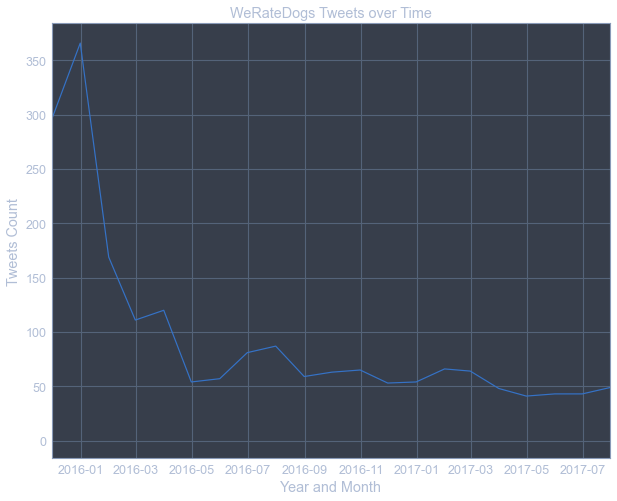

In [86]:
# Plotting time vs. tweets

plt.figure(figsize=(10, 8))
plt.xlim([datetime.date(2015, 11, 30), datetime.date(2017, 7, 30)]) 

plt.xlabel('Year and Month')
plt.ylabel('Tweets Count')

plt.plot(monthly_tweets.timestamp, monthly_tweets.tweet_id)
plt.title('WeRateDogs Tweets over Time');

Over time tweets decreased sharply, with spikes in inactivity during the early spring of 2016, mid-summer of 2016, and generally decreasing from there.

#### 2. Analyze and Visualize: Visualizing the retweet counts, and favorite counts comparison over time.

C:\Users\sshwe\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


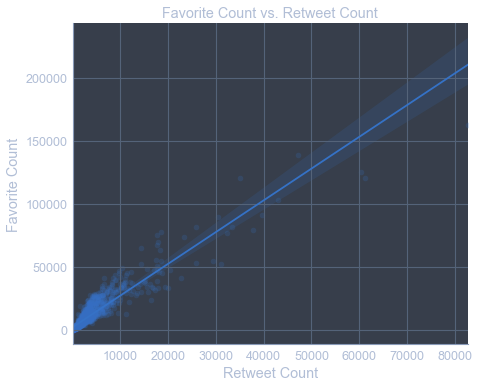

In [87]:
# Scatterplot of retweets vs favorite count

sns.lmplot(x="retweet_count", 
           y="favorite_count", 
           data=twitter_dogs,
           size = 5,
           aspect=1.3,
           scatter_kws={'alpha':1/5});

plt.title('Favorite Count vs. Retweet Count');
plt.xlabel('Retweet Count');
plt.ylabel('Favorite Count');

Favorite counts are correlated with retweet counts - this is a positive correlation.

#### 3. Analyze and Visualize: Visualizing the most popular dog breed

In [89]:
twitter_dogs['dog_type'].value_counts()

pupper     223
doggo       72
puppo       28
floofer      3
Name: dog_type, dtype: int64

The most popular dog breed is a golden retriever (igonring the none label), with a labrador retriever coming in as the second most popular breed. Pembroke isn't far behind.

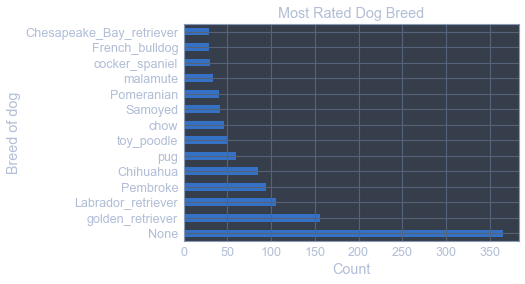

In [90]:
# Histogram to visualize dog breeeds
dog_breed = twitter_dogs.groupby('dog_breed').filter(lambda x: len(x) >= 25)

dog_breed['dog_breed'].value_counts().plot(kind = 'barh')
plt.title('Most Rated Dog Breed')
plt.xlabel('Count')
plt.ylabel('Breed of dog');

#### 4. Analyze and Visualize: Visualizing the most popular dog names.

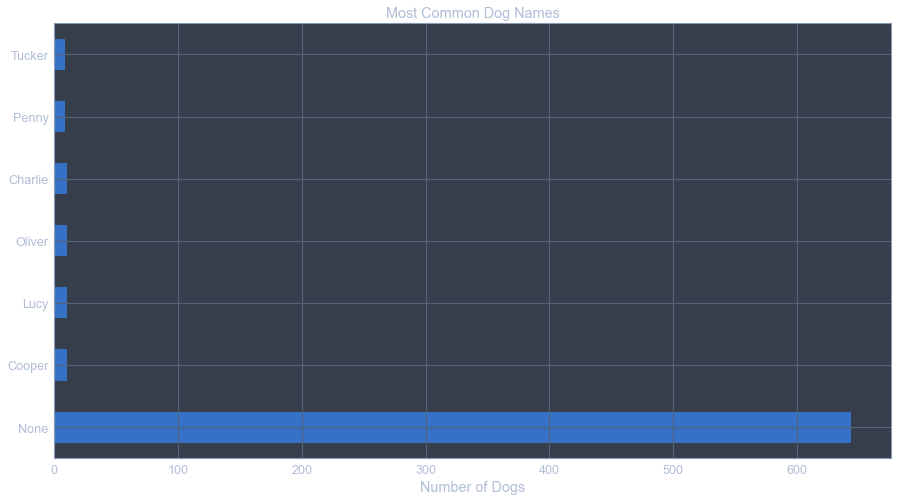

In [105]:
twitter_dogs.name.value_counts()[0:7].plot(kind="barh", figsize=(15,8), title='Most Common Dog Names').set_xlabel("Number of Dogs");

In [107]:
twitter_dogs.name.value_counts()

None       644
Cooper      10
Lucy        10
Oliver      10
Charlie     10
          ... 
Boots        1
Rocco        1
Bilbo        1
Derby        1
Chubbs       1
Name: name, Length: 913, dtype: int64

The three most popular dog names are Oliver, Cooper, Charlie, and Lucy for a tie at ten each.